In [1]:
import matplotlib
#matplotlib.use('Agg')
%matplotlib tk
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.cm as cm
from matplotlib import gridspec

import numpy as np
import pandas as pd
import os
import shutil
import cv2

import glob2

from numba import jit

colors = [
'black','grey','brown','slategrey','darkviolet','darkmagenta',
'blue','blue','blue',
'red','red','red',
'green','green','green',
'cyan','cyan','cyan',
'orange','orange','orange',
    
'orange','firebrick','lawngreen','dodgerblue','crimson','orchid','slateblue''darkgreen','darkorange','indianred','darkviolet','deepskyblue','greenyellow',
'peru','cadetblue','forestgreen','slategrey','lightsteelblue','rebeccapurple',
'darkmagenta','yellow','hotpink']


Autosaving every 180 seconds


In [2]:
fnames = np.loadtxt('/media/cat/14TB/insync_cm5636/march_2/video/dlc_2.26b_results/file_list_videos_totrain.txt',dtype='str')
print (fnames)

['/media/cat/14TB/insync_cm5636/march_2/video/2020-3-7_08:05:18:848935.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-8_07:13:11:496279.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-8_12:11:35:591377.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-9_09:19:03:168176.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-10_01:19:58:179641.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-11_03:25:55:871743.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-11_03:25:55:871743.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-13_04:37:23:252483.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-14_06:46:40:000874.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-15_03:48:53:250502.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-16_05:55:25:305681.avi'
 '/media/cat/14TB/insync_cm5636/march_2/video/2020-3-17_03:00:57:671054.avi']


In [6]:

for fname in fnames:
    print (fname)
    os.system('ffmpeg -i '+fname+ ' -c:v libx264 -r 25 -crf 20 '+os.path.split(fname)[0]+'/dlc_2.26b_results/'+
              os.path.split(fname)[1][:-4]+'_compressed.avi')
    

    
    
    

/media/cat/14TB/insync_cm5636/march_2/video/2020-3-7_08:05:18:848935.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-8_07:13:11:496279.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-8_12:11:35:591377.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-9_09:19:03:168176.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-10_01:19:58:179641.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-11_03:25:55:871743.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-11_03:25:55:871743.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-13_04:37:23:252483.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-14_06:46:40:000874.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-15_03:48:53:250502.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-16_05:55:25:305681.avi
/media/cat/14TB/insync_cm5636/march_2/video/2020-3-17_03:00:57:671054.avi


In [10]:
data = np.load('/media/cat/12TB/insync_cm3746/dlc/march_2_cat_label-cat-2020-06-11/training-datasets/iteration-0/UnaugmentedDataSet_march_2_cat_labelJun11/Documentation_data-march_2_cat_label_95shuffle1.pickle',allow_pickle=True)


In [11]:
print (data)

[[{'image': 'labeled-data/2020-3-8_12:08:57:943006_compressed/img00374.png', 'size': array([   3, 1024, 1280]), 'joints': {0: array([[  3.  , 218.78, 546.84],
       [  4.  , 183.66, 511.72],
       [  5.  , 205.03, 523.94],
       [  6.  , 218.78, 496.45],
       [  7.  , 234.04, 464.39],
       [  8.  , 260.  , 433.85],
       [  9.  , 289.01, 409.42],
       [ 10.  , 307.33, 377.36],
       [ 11.  , 328.71, 337.66],
       [ 12.  , 356.19, 285.75],
       [ 13.  , 362.3 , 244.53]]), 1: array([[   5.  , 1130.29,  152.92],
       [   6.  , 1092.12,  139.17],
       [   7.  , 1060.06,  128.49],
       [   8.  , 1024.94,  117.8 ],
       [   9.  ,  992.88,  119.33],
       [  10.  ,  968.45,   94.9 ],
       [  11.  ,  937.91,   79.63],
       [  12.  ,  889.05,   73.52],
       [  13.  ,  840.2 ,   59.78]]), 2: array([[1.00000e+00, 1.13029e+03, 5.91120e+02],
       [3.00000e+00, 1.12877e+03, 6.06380e+02],
       [4.00000e+00, 1.15930e+03, 6.14020e+02],
       [5.00000e+00, 1.14404e+03,

In [2]:
import numpy as np
data = np.load('/media/cat/12TB/insync_cm3746/paninski_lab/data/spikingforest/bionet_static/static_8x_A_2A/tmp/output/templates/templates_0sec.npy')
print (data.shape)

(57, 101, 60)


In [13]:

fnames = glob2.glob('/media/cat/4TBSSD/yuki/IA2/prestroke/*.wmv')
print (fnames)




[]


In [10]:
data = np.fromfile('/media/cat/12TB/insync_cm3746/paninski_lab/data/spikingforest/bionet_static/static_8x_A_2A/data.bin','int16')
data2d = data.reshape( 60, -1).T
#data2d.tofile


In [13]:
data1d = data2d.reshape(-1)
print (data1d.shape)

(1152000000,)


In [16]:
data1d.tofile('/media/cat/12TB/insync_cm3746/paninski_lab/data/spikingforest/bionet_static/static_8x_A_2A/data_python.bin')

In [14]:
data2d = data1d.reshape(-1,60)


In [15]:
for k in range(60):
    plt.plot(data2d[:10000, k]+k*10,c='black')
plt.show()

In [15]:
for fname in fnames:
    print (fname)
    os.system('ffmpeg -i '+fname+ ' -c:v libx264 -r 15 -crf 23 -q:a 100 -vf scale=640:360 '+fname[:-4]+'.mp4')

In [16]:
import numpy as np
s = np.random.poisson(1, 1000)
print (s,s.shape)
print (np.unique(s))
import matplotlib.pyplot as plt
#count, bins, ignored = plt.hist(s, 14, normed=True)
y = np.histogram(s, bins = np.arange(0,20,1))
plt.plot(y[1][1:],y[0])
plt.show()



[1 1 1 0 0 0 0 1 0 1 0 2 0 1 0 2 1 0 0 0 0 3 0 0 0 2 0 0 1 1 3 1 0 2 2 1 2
 0 2 0 1 0 0 0 4 3 2 3 0 0 4 1 1 0 1 0 0 2 3 2 2 1 0 1 2 1 0 0 1 1 1 2 2 1
 0 0 0 1 1 1 2 0 1 2 1 1 0 0 4 0 2 3 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 3 0 0 0
 0 1 0 1 0 0 0 1 3 1 0 1 0 2 1 4 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 2 0 0 1 0 2 1 4 0 0 0 0 1 0 0 3 3 1 0 2 0 2 0 0 1 2 1 1 1
 2 0 0 2 1 0 1 1 0 1 1 4 2 1 1 0 1 0 0 1 0 2 2 0 2 1 1 1 0 0 2 0 0 0 0 0 0
 0 3 1 1 0 1 1 2 0 0 1 1 0 1 1 0 0 0 1 1 0 0 2 0 0 0 0 1 1 4 2 1 0 1 1 2 0
 1 3 3 0 0 2 1 1 0 1 2 1 0 0 1 2 2 3 0 0 2 0 1 2 1 1 2 2 1 0 1 1 0 0 1 2 2
 3 0 1 0 1 0 0 0 0 1 1 0 3 2 1 0 1 1 5 1 1 0 1 0 1 2 1 1 2 0 3 0 0 0 2 2 1
 1 1 2 1 2 1 1 1 4 0 1 1 2 0 3 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 3 2 1 0 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 2 3 1 2 1 1 0 1 5 1 3 0 0 0 3 1 1
 2 1 0 1 2 1 1 1 2 1 0 1 0 2 0 2 0 2 2 0 2 0 1 1 2 1 3 2 1 2 2 2 0 2 1 2 1
 1 1 1 2 1 1 0 2 2 1 1 0 1 2 1 0 2 0 1 0 2 1 1 2 2 0 1 0 0 1 3 0 1 0 1 2 0
 0 0 1 1 1 1 0 1 0 0 0 2 

In [17]:
n_units = 1
f_rate = 5
bin_width = 0.001 # ms precise bins;
thresh = f_rate*bin_width
rec_len = 10 #seconds

for unit in range(n_units):
    spikes = np.random.rand(int(rec_len/bin_width))
    #print (spikes.shape)

    idx=np.where(spikes<=thresh)[0]

    diffs = idx[1:]-idx[:-1]
    print ("times DIFFS: ", diffs)
    idx2 = np.where(diffs>=100)[0]
    diffs[idx2]=100
    
    scale = np.exp((diffs-100)/200)
    print ("scale: ", scale)
    scale = np.hstack((1.0,scale))

    plt.scatter(idx, idx*0+unit, s=100*scale, c='black')
plt.show()



times DIFFS:  [  33   62  178   25  549  151  274  169    5  179    1   22  328  249
  189  298  174  170  218   64  429   19  185  110  222   60   34  213
   89   35  336  213  347   68   77   49  231   15  508   69  237  212
  215    8  148   65  235 1015   76   47  690  183]
scale:  [0.71533809 0.82695913 1.         0.68728928 1.         1.
 1.         1.         0.62188506 1.         0.60957091 0.67705687
 1.         1.         1.         1.         1.         1.
 1.         0.83527021 1.         0.66697681 1.         1.
 1.         0.81873075 0.71892373 1.         0.94648515 0.72252735
 1.         1.         1.         0.85214379 0.89136614 0.7749165
 1.         0.65376979 1.         0.85641518 1.         1.
 1.         0.63128365 1.         0.83945702 1.         1.
 0.88692044 0.76720595 1.         1.        ]


In [18]:
geom = np.loadtxt('/home/cat/Downloads/519coords_30.txt')
ax=plt.subplot(111)
plt.scatter(geom[:,0], geom[:,1])
#plt.xlabel("(micrometers)",fontsize=100)
#plt.ylabel("(micrometers)",fontsize=100)
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)

plt.show()

OSError: /home/cat/Downloads/519coords_30.txt not found.

In [ ]:
fname = '/media/cat/1TB/sync_test/video/2020-4-20_09:16:47:293183.avi'

import pims
V = pims.Video(fname)

In [ ]:
print (len(V))
led = []
ctr=0
for k in range(len(V)):
    if ctr%1000==0:
        print ("frame: ", ctr)
    led.append(V[k][285,260])
    ctr+=1
    #led.append(frame[310,380])


In [ ]:
import cv2
from skimage.io import Video

cap = Video(fname)
fc = cap.frame_count()
for i in np.arange(fc):
   z = cap.get_index_frame(i)


In [11]:
print (led[1])
plt.imshow(led[0])
plt.show()

Sliced ImageIOReader. Original repr:
    <Frames>
    Length: 89989 frames
    Frame Shape: 1024 x 1280
    Pixel Datatype: uint8


IndexError: 285

In [8]:
plt.plot(led)
plt.show()

IndexError: 285

In [12]:
# read using opencv
fname = '/media/cat/1TB/sync_test/video/2020-4-20_09:16:47:293183.avi'
cap = cv2.VideoCapture(fname)

led = []
ctr=0
while True:
    if ctr%1000==0:
        print ("frame: ", ctr)
    ret, frame = cap.read()
    if ret==False:
        break
    led.append(frame[285,260].copy())
    del frame, ret
    ctr+=1


frame:  0
frame:  1000
frame:  2000
frame:  3000
frame:  4000
frame:  5000
frame:  6000
frame:  7000
frame:  8000
frame:  9000
frame:  10000
frame:  11000
frame:  12000
frame:  13000
frame:  14000
frame:  15000
frame:  16000
frame:  17000
frame:  18000
frame:  19000
frame:  20000
frame:  21000
frame:  22000
frame:  23000
frame:  24000
frame:  25000
frame:  26000
frame:  27000
frame:  28000
frame:  29000
frame:  30000
frame:  31000
frame:  32000
frame:  33000
frame:  34000
frame:  35000
frame:  36000
frame:  37000
frame:  38000
frame:  39000
frame:  40000
frame:  41000
frame:  42000
frame:  43000
frame:  44000
frame:  45000
frame:  46000
frame:  47000
frame:  48000
frame:  49000
frame:  50000
frame:  51000
frame:  52000
frame:  53000
frame:  54000
frame:  55000
frame:  56000
frame:  57000
frame:  58000
frame:  59000
frame:  60000
frame:  61000
frame:  62000
frame:  63000
frame:  64000
frame:  65000
frame:  66000
frame:  67000
frame:  68000
frame:  69000
frame:  70000
frame:  71000
frame

In [13]:
np.save('/media/cat/1TB/sync_test/video/2020-4-20_09:16:47:293183_led_times.npy', led)

In [16]:
led=np.array(led)
print (led.shape)
plt.plot(led[:,1])
plt.show()

(89989, 3)


In [45]:
idx = np.where(led[:,1]>100)[0]

vid_times = np.loadtxt('/media/cat/1TB/sync_test/times/2020-4-20_09:16:47:293183.txt')
vid_times -=vid_times[0]
print (vid_times)
print (vid_times.shape)

vid_times=vid_times[idx]

[0.00000000e+00 4.00040000e-02 8.00070000e-02 ... 3.59977907e+03
 3.59981907e+03 3.59985908e+03]
(89989,)


In [32]:
np.save('/media/cat/1TB/sync_test/idx_first_half.npy', idx_corrected_first_half)
np.save('/media/cat/1TB/sync_test/idx_second_half.npy', idx_corrected_second_half)


In [46]:
# load trigger times
trigger = np.loadtxt('/media/cat/1TB/sync_test/time_str.txt')
print (trigger.shape)
print (trigger[:10])
print (vid_times[:10]-vid_times[0]+1)
print (np.array(idx_corrected)[:10]/200.)

plt.scatter(trigger, trigger*0, c='black')
plt.scatter(vid_times-vid_times[0]+1, vid_times*0+1,c='red')
plt.scatter(np.array(idx_corrected_first_half)/200.-0.195, np.array(idx_corrected_first_half)*0+2, c='blue')
plt.scatter(np.array(idx_corrected_second_half)/200.+1800-0.195, np.array(idx_corrected_second_half)*0+2, c='blue')

plt.show()

(3600,)
[ 1.00000095  2.00000095  3.00000095  4.00000095  5.00000095  6.00000095
  7.00000095  8.00000095  9.00000095 10.00000095]
[ 1.        2.000094  3.000189  4.000283  5.000377  6.000472  7.000565
  8.00066   9.000753 10.000848]
[0.29 1.29 2.29 3.29 4.29 5.29 6.29 7.29 8.29 9.29]


In [70]:
print (len(idx_corrected_first_half))
print (len(idx_corrected_second_half))


1803
1798


In [66]:
def find_nearest(t1, t2):
    
    times = []
    for t in t1:
        diff = np.min(np.abs(t2-t))
        times.append(diff)

    return times
    
vid_times = vid_times-vid_times[0]+1
audio_times = np.array(idx_corrected_first_half)/200.-0.195

ax=plt.subplot(211)
times_vid = find_nearest(trigger, vid_times)
hist_video = np.histogram(times_vid, np.arange(-0.050,0.50,.005))
plt.plot(hist_video[1][:-1], hist_video[0])
plt.title("Histogram of time differences between LED trigger and Video Frame",fontsize=15)
#plt.xlabel("Time differene (sec)")

ax=plt.subplot(212)
times_audio = find_nearest(trigger, audio_times)
hist_video = np.histogram(times_audio, np.arange(-.050,.50,.005))
plt.plot(hist_video[1][:-1], hist_video[0])
plt.title("Histogram of time difference between Audio trigger and Microphone Peak",fontsize=15)
plt.xlabel("Time difference (sec)",fontsize=15)

plt.suptitle("LED and Speaker triggered analysis of 1hour video+audio recording using "+
             "\nDodotronics ULTRAMIC384 and FLIR USB3.0 BLACKFLY Camera",
            fontsize=20)
plt.show()

In [9]:
print (idx_corrected)

[0, 39, 239, 439, 639, 839, 1039, 1239, 1439, 1639, 1839, 2039, 2239, 2439, 2639, 2839, 3039, 3239, 3439, 3639, 3839, 4039, 4240, 4440, 4640, 4840, 5040, 5240, 5440, 5640, 5840, 6040, 6240, 6440, 6640, 6840, 7040, 7240, 7440, 7640, 7840, 8040, 8240, 8440, 8640, 8840, 9040, 9240, 9440, 9640, 9841, 10041, 10241, 10441, 10641, 10841, 11041, 11241, 11441, 11641, 11841, 12041, 12241, 12441, 12641, 12841, 13041, 13241, 13441, 13641, 13841, 14041, 14241, 14441, 14641, 14841, 15041, 15241, 15441, 15642, 15842, 16042, 16242, 16442, 16642, 16842, 17042, 17242, 17442, 17642, 17842, 18042, 18242, 18442, 18642, 18842, 19042, 19242, 19442, 19642, 19842, 20042, 20242, 20442, 20642, 20842, 21042, 21242, 21443, 21643, 21843, 22043, 22243, 22443, 22643, 22843, 23043, 23243, 23443, 23643, 23843, 24043, 24243, 24443, 24643, 24843, 25043, 25243, 25443, 25643, 25843, 26043, 26243, 26443, 26643, 26843, 27043, 27244, 27444, 27644, 27844, 28044, 28244, 28444, 28644, 28844, 29044, 29244, 29444, 29644, 29844, 30

In [3]:
from scipy.io.wavfile import write
samplerate = 384000

data = np.load('/media/cat/1TB/sync_test/audio/2020-4-20_09:16:47:293183.npy')
print (data.shape)
#write("/media/cat/1TB/sync_test/audio/2020-4-20_09:16:47:293183.wav", samplerate, data)

(1382400000, 1)


In [2]:
import librosa
import numpy as np

wav_file = '/media/cat/1TB/sync_test/audio/2020-4-20_09:16:47:293183.wav'
(sig, rate) = librosa.load(wav_file, sr=None, mono=True,  dtype=np.float32)
print (sig.shape, rate)


(1382400000,) 384000


In [138]:
fnames = np.load('/media/cat/1TB/data/yuki/iA2/event_files.npy')
print (fnames)
fnames_new = []
for fname in fnames:
    fnames_new.append(fname.replace('12TB/in_vivo/tim/yuki/IA2','1TB/data/yuki/iA2'))
    
print (np.vstack(fnames_new))
print (fnames_new[0])
np.save('/media/cat/1TB/data/yuki/iA2/event_files.npy', fnames_new)

['/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-1-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-2-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-3-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-4-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-5-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-9-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-10-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-11-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-12-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-15-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-16-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-17-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-18-2016_PM.txt'
 '/media/cat/12TB/in_vivo/tim/yuki/IA2/event_files/IA2_2-

In [128]:
maskwarp= np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2am_May2_Week4_30Hz/maskwarp.npy')
data = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2am_May2_Week4_30Hz/IA2am_May2_Week4_30Hz_aligned.npy')
print (data.shape)
plt.imshow(data[300],cmap="Greys",alpha=.6)
plt.imshow(maskwarp,alpha=.7)
plt.show()


data1D = data[:1000].reshape(1000,-1)
print (data1D.shape)


(40000, 128, 128)
(1000, 16384)


In [139]:
data = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/data_all_trials_april22.npy')
print (data.shape)


(63, 181, 128, 128)


In [140]:
areas = np.unique(maskwarp)
print (" # of areas: ", areas.shape)
maskwarp1D = maskwarp.reshape(-1)

all_times = []
for k in range(data.shape[0]):
    time_courses = []
    data1D = data[k].reshape(181,-1)
    for id_ in areas:
        #print ("id: ", id_)
        idx = np.where(maskwarp1D==id_)[0]
        if idx.shape[0]>10:
            print (data1D[:,idx].shape)
            time_courses.append(data1D[:,idx].mean(1))
    all_times.append(time_courses)
    
    

time_courses = np.array(time_courses)
print (time_courses.shape)



 # of areas:  (253,)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181, 1623)
(181, 28)
(181, 298)
(181, 89)
(181, 100)
(181, 124)
(181, 131)
(181, 611)
(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 102)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181, 1623)
(181, 28)
(181, 298)
(181, 89)
(181, 100)
(181, 124)
(181, 131)
(181, 611)
(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 102)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181,

(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181, 1623)
(181, 28)
(181, 298)
(181, 89)
(181, 100)
(181, 124)
(181, 131)
(181, 611)
(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 102)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181, 1623)
(181, 28)
(181, 298)
(181, 89)
(181, 100)
(181, 124)
(181, 131)
(181, 611)
(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 102)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181, 1623)
(181, 28)
(181, 298)
(181, 89)
(181, 100)
(181, 124)
(181, 131)
(181, 611)
(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 

(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 102)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181, 1623)
(181, 28)
(181, 298)
(181, 89)
(181, 100)
(181, 124)
(181, 131)
(181, 611)
(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 102)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(181, 196)
(181, 54)
(181, 35)
(181, 160)
(181, 194)
(181, 229)
(181, 1623)
(181, 28)
(181, 298)
(181, 89)
(181, 100)
(181, 124)
(181, 131)
(181, 611)
(181, 1004)
(181, 135)
(181, 354)
(181, 233)
(181, 36)
(181, 105)
(181, 355)
(181, 102)
(181, 2335)
(181, 43)
(181, 1393)
(181, 12)
(181, 13)
(181, 2600)
(181, 299)
(181, 1002)
(181, 406)
(181, 485)
(181, 564)
(181, 303)
(181, 180)
(1

In [146]:
all_times = np.array(all_times)
print (all_times.shape)

for k in range(35):
    ax=plt.subplot(7,10,k+1)
    plt.plot(all_times[:,k].T)
    plt.title("Area: "+str(k))
    
    plt.xticks()
    
plt.show()

(63, 35, 181)


In [ ]:

(n_trials, n_areas, n_times)


In [127]:
t = np.arange(time_courses.shape[1])/30.
plt.plot(t, time_courses[:,:1000].T)
plt.xlabel("Time (seconds)",fontsize=20)
plt.ylabel("Activity in ROIs that are larger than > 10 pixels\n(128 x 128 image size)",fontsize=20)
plt.show()


In [24]:
# visualize audio
from Specgram.Specgram import Specgram
#print (data.shape)

P_first_half, extent = Specgram(sig[:691200000].squeeze(), sampfreq = 384000, 
                     p0=-300, f0=0.1, f1=384000, 
                     width=0.01, tres = 0.005)
P_second_half, extent = Specgram(sig[691200000:].squeeze(), sampfreq = 384000, 
                     p0=-300, f0=0.1, f1=384000, 
                     width=0.01, tres = 0.005)




Computing regular fft specgram
Computing regular fft specgram


In [25]:
np.save('/media/cat/1TB/sync_test/P_first_half.npy', P_first_half)
np.save('/media/cat/1TB/sync_test/P_second_half.npy', P_second_half)
np.save('/media/cat/1TB/sync_test/extent.npy', extent)


(1920, 359999) (0.0, 1799.9999973958334, 100.0, 192000.0)


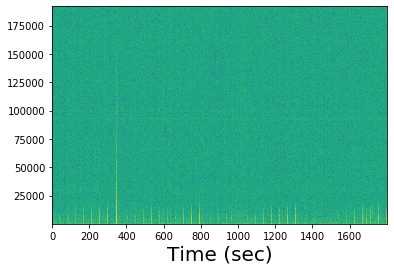

In [5]:
import matplotlib.pyplot as plt
print (P.shape, extent)
plt.imshow(P,extent=extent, aspect='auto')
plt.xlabel("Time (sec)", fontsize=20)
plt.show()


In [28]:
data = P_second_half #[:1920,:120000]
print (data.sum(0).mean())
data = data.sum(0)-data.sum(0).mean(0)

scale = P.shape[1]/200.
t=np.arange(P.shape[1])/200.

# find peaks
thresh = 18000
idx = np.where(data>thresh)[0]
idx_corrected=[]
idx_corrected.append(idx[0])
for k in range(1, idx.shape[0], 1):
    if idx[k]-idx[k-1]>5:
        idx_corrected.append(idx[k])
    
idx = np.array(idx_corrected)
#print (idx)

# find peaks that different various amounts
diffs = idx[1:]-idx[:-1]
print (diffs.shape)

idx2 = np.where(np.logical_and(diffs!=200,diffs>3,diffs!=199))[0]
print (diffs[idx2])

ax=plt.subplot(211)
plt.plot(t, data)
plt.plot([0,119999/200.],[thresh,thresh],c='red')
for id_ in idx_corrected:
    plt.plot([id_/200.,id_/200.],[0,30000],c='green')
for id_ in idx[idx2+1]:
    plt.plot([id_/200.,id_/200.],[0,30000],c='red')
    
ax=plt.subplot(212)
y = np.histogram(diffs, bins = np.arange(10,400,.001))
plt.plot(y[1][:-1]/scale,y[0])
ax.set_yscale('log')
plt.title("600 second audio recording of 1sec beeps", fontsize=20)
plt.xlabel("Inter-beep interval distributions (seconds)",fontsize=20)
plt.ylabel("# of frames apart by x-axis amount",fontsize=20)
plt.show()

-319652.6206017865
(1797,)
[201 197 201 201 201 201 201 201 199 201 197 201 197 201 197 201 201 201
 195 201 199 201 201 195 201 197 201 201 201 201 201 195 201 196 201 201
 197 201 201 196 201 201 201 201 196 201 201 201 197 197 201 201 201 197
 120  77 197 196 201 201 201 197 197 199 198 201 195 196 201 201 197  67
 130 195 201 201 195 201 201 196 201 201 201 201 201 201 197 201 201 201
 196 201 201 201 196 201 196 201 197 196 201 201 195]


In [27]:
idx_corrected_first_half = idx_corrected.copy()

#import wavio
#wavio.write("/media/cat/1TB/sync_test/audio/2020-4-20_09:16:47:293183.wav", data, 384000, sampwidth=1)

In [29]:
idx_corrected_second_half = idx_corrected.copy()


In [ ]:
_wav_file_ = "/media/cat/1TB/sync_test/audio/2020-4-20_09:16:47:293183.wav"

def spectogram_librosa(_wav_file_):
    import pylab
    import numpy as np

    (sig, rate) = librosa.load(_wav_file_, sr=None, mono=True,  dtype=np.float32)
    pylab.specgram(sig, Fs=rate)
    pylab.savefig('spectrogram3.png')

def graph_spectrogram_wave(wav_file):
    import wave
    import pylab
    def get_wav_info(wav_file):
        wav = wave.open(wav_file, 'r')
        frames = wav.readframes(-1)
        sound_info = pylab.fromstring(frames, 'int16')
        frame_rate = wav.getframerate()
        wav.close()
        return sound_info, frame_rate
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=3, figsize=(10, 6))
    pylab.title('spectrogram pylab with wav_file')
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram2.png')


def graph_wavfileread(_wav_file_):
    import matplotlib.pyplot as plt
    from scipy import signal
    from scipy.io import wavfile
    import numpy as np   
    sample_rate, samples = wavfile.read(_wav_file_)   
    frequencies, times, spectrogram = signal.spectrogram(samples,sample_rate,nfft=1024)
    plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.savefig("spectogram1.png")


spectogram_librosa(_wav_file_)
#graph_wavfileread(_wav_file_)
#graph_spectrogram_wave(_wav_file_)

In [2]:
amplitudes = np.load('/media/cat/1TB/amplitudes.npy')
print (amplitudes.shape)


ids = np.load('/media/cat/1TB/spike_clusters.npy')
print (ids.shape)

times = np.load('/media/cat/1TB/spike_times.npy')
print (times.shape)

spike_train = np.load('/media/cat/1TB/Dropbox/code/data/spike_train.npy')
print (spike_train.shape)

print (times[:25]-30)
print (spike_train[:25])

FileNotFoundError: [Errno 2] No such file or directory: '/media/cat/1TB/amplitudes.npy'

In [15]:
for k in range(10):
    idx = np.where(ids==k)[0]
    
    times1 = times[idx]-30
    
    for q in np.unique(spike_train[:,1]):
        idx2 = np.where(spike_train[:,1]==q)[0]
        times2 = spike_train[idx2,0]
        
        diffs = times1-times2
        idx3 = np.where(diffs==0)[0]
        if idx3.shape[0]>0:
            print ("Unit ",k, " matches unit: ", q, " # matches: ", idx3.shape)
    
    plt.scatter(times[idx] + k, amplitudes[idx])
plt.show()



Unit  0  matches unit:  4  # matches:  (1,)
Unit  0  matches unit:  28  # matches:  (1,)
Unit  0  matches unit:  47  # matches:  (1,)
Unit  0  matches unit:  85  # matches:  (1,)
Unit  1  matches unit:  0  # matches:  (1,)
Unit  1  matches unit:  89  # matches:  (1,)
Unit  1  matches unit:  96  # matches:  (1,)
Unit  1  matches unit:  116  # matches:  (1,)
Unit  1  matches unit:  122  # matches:  (1,)
Unit  1  matches unit:  127  # matches:  (1,)
Unit  1  matches unit:  182  # matches:  (1,)
Unit  2  matches unit:  49  # matches:  (1,)
Unit  2  matches unit:  135  # matches:  (1,)
Unit  4  matches unit:  118  # matches:  (1,)
Unit  5  matches unit:  17  # matches:  (1,)
Unit  5  matches unit:  25  # matches:  (1,)
Unit  5  matches unit:  122  # matches:  (1,)
Unit  5  matches unit:  153  # matches:  (1,)
Unit  6  matches unit:  88  # matches:  (1,)
Unit  6  matches unit:  104  # matches:  (1,)
Unit  7  matches unit:  118  # matches:  (1,)
Unit  8  matches unit:  83  # matches:  (1,)
Un

In [15]:
# visualize recomputed templates over time;
def binary_reader_waveforms(filename, n_channels, n_times, spikes, data_type='float32'):
    ''' Reader for loading raw binaries
    
        standardized_filename:  name of file contianing the raw binary
        n_channels:  number of channels in the raw binary recording 
        n_times:  length of waveform 
        spikes: 1D array containing spike times in sample rate of raw data
        channels: load specific channels only
        data_type: float32 for standardized data
    
    '''

    # ***** LOAD RAW RECORDING *****
    wfs=[]
    if data_type =='float32':
        data_len = 4
    else:
        data_len = 2
        
    with open(filename, "rb") as fin:
        for ctr,s in enumerate(spikes):
                #print (ctr,s)
            # index into binary file: time steps * 4  4byte floats * n_channels
            try:
                fin.seek(s * data_len * n_channels, os.SEEK_SET)
                wfs.append(np.fromfile(
                    fin,
                    dtype=data_type,
                    count=(n_times * n_channels)).reshape(n_times, n_channels))

            except:
                pass
    fin.close()
    return np.array(wfs)


fname = '/media/cat/1TB/data/synthetic/run3/data_int16.bin'
data_type = 'int16'
#fname = '/media/cat/1TB/synthetic/synthetic_600sec_385chan_drift_int16.bin'
#data_type = 'int16'

n_channels = 384
n_times = 101

if True:
    times = np.load('/media/cat/1TB/data/synthetic/run3/spike_times.npy')-n_times//2
    ids = np.load('/media/cat/1TB/data/synthetic/run3/spike_clusters.npy')
    spike_train = np.hstack((times,ids))
    
else:
    spike_train = np.load('/media/cat/1TB/data/synthetic/run3/ground_truth/spike_train_ground_truth.npy')

    
print (spike_train.shape)
print (spike_train)

units = np.unique(spike_train[:,1])
print ("units; ", units.shape)
templates = []
ptps = []
time_start = 0
time_end = time_start+600
wfs_array = []
times = []
for unit in units:#[:20]:
    if unit%10==0:
        print (unit)
    idx = np.where(spike_train[:,1]==unit)[0]
    #print (idx.shape)
    spikes = np.int32(spike_train[idx,0]) #-n_times//2#-30
    # sub sample spikes to speed up loading
    
    idx = np.where(np.logical_and(spikes>=(time_start*30000), spikes<(time_end*30000)))[0]
    spikes = spikes[idx]
    if idx.shape[0]==0:
        ptps.append([])
        templates.append(np.zeros((n_times,n_channels)))
        times.append([])
        continue

    times.append(spikes)
    #print (spikes.shape)
    
    # spikes = spikes[::10]
    wfs = binary_reader_waveforms(fname, n_channels, n_times, spikes, data_type)
    temp = wfs.mean(0)
    print (unit, wfs.shape, temp.shape)
    templates.append(temp)
    
    # max_chan
    max_chan = temp.ptp(0).argmax(0)
    wfs_array.append(wfs[:,:,max_chan])
    max_ = np.argmax(temp[:, max_chan])
    min_ = np.argmin(temp[:, max_chan])
    #max_= 57
    #min_ = 51
    
    ptp = wfs[:,max_,max_chan] - wfs[:,min_,max_chan]
    #ptp = wfs.ptp(1).max(1)
    print ("max chan:", max_chan, "PTP: ", ptp.mean(0))
    #print( "unit: ", unit, ", ptp: ", ptp)
    #print ("PTS: ", wfs.ptp(1).max(1))
    ptps.append(ptp)
    
    

(578505, 2)
[[      38      560]
 [      51       79]
 [      72      386]
 ...
 [17999770      445]
 [17999775      552]
 [17999784      331]]
units;  (611,)
0
0 (82, 101, 384) (101, 384)
max chan: 182 PTP:  57.71951219512195
1 (60, 101, 384) (101, 384)
max chan: 198 PTP:  67.91666666666667
2 (61, 101, 384) (101, 384)
max chan: 105 PTP:  68.95081967213115
3 (66, 101, 384) (101, 384)
max chan: 6 PTP:  58.77272727272727
4 (64, 101, 384) (101, 384)
max chan: 328 PTP:  69.0625
5 (116, 101, 384) (101, 384)
max chan: 34 PTP:  45.310344827586206
6 (104, 101, 384) (101, 384)
max chan: 236 PTP:  50.94230769230769
7 (69, 101, 384) (101, 384)
max chan: 7 PTP:  63.507246376811594
8 (61, 101, 384) (101, 384)
max chan: 7 PTP:  72.78688524590164
9 (61, 101, 384) (101, 384)
max chan: 7 PTP:  65.18032786885246
10
10 (71, 101, 384) (101, 384)
max chan: 50 PTP:  69.84507042253522
11 (8407, 101, 384) (101, 384)
max chan: 8 PTP:  239.98108718924706
12 (59, 101, 384) (101, 384)
max chan: 126 PTP:  70.69491

133 (59, 101, 384) (101, 384)
max chan: 299 PTP:  68.9322033898305
134 (119, 101, 384) (101, 384)
max chan: 337 PTP:  50.39495798319328
135 (60, 101, 384) (101, 384)
max chan: 22 PTP:  69.13333333333334
136 (62, 101, 384) (101, 384)
max chan: 358 PTP:  68.04838709677419
137 (60, 101, 384) (101, 384)
max chan: 166 PTP:  65.13333333333334
138 (61, 101, 384) (101, 384)
max chan: 257 PTP:  72.57377049180327
139 (7354, 101, 384) (101, 384)
max chan: 145 PTP:  225.8025564318738
140
140 (62, 101, 384) (101, 384)
max chan: 138 PTP:  82.80645161290323
141 (79, 101, 384) (101, 384)
max chan: 138 PTP:  52.63291139240506
142 (98, 101, 384) (101, 384)
max chan: 138 PTP:  55.51020408163265
143 (66, 101, 384) (101, 384)
max chan: 331 PTP:  60.07575757575758
144 (110, 101, 384) (101, 384)
max chan: 253 PTP:  45.236363636363635
145 (5016, 101, 384) (101, 384)
max chan: 145 PTP:  240.7408293460925
146 (71, 101, 384) (101, 384)
max chan: 145 PTP:  63.88732394366197
147 (104, 101, 384) (101, 384)
max chan

256 (6453, 101, 384) (101, 384)
max chan: 169 PTP:  265.3065240973191
257 (83, 101, 384) (101, 384)
max chan: 2 PTP:  59.265060240963855
258 (66, 101, 384) (101, 384)
max chan: 303 PTP:  61.56060606060606
259 (60, 101, 384) (101, 384)
max chan: 236 PTP:  63.6
260
260 (63, 101, 384) (101, 384)
max chan: 64 PTP:  71.63492063492063
261 (98, 101, 384) (101, 384)
max chan: 169 PTP:  60.265306122448976
262 (4346, 101, 384) (101, 384)
max chan: 170 PTP:  278.27220432581686
263 (70, 101, 384) (101, 384)
max chan: 269 PTP:  58.74285714285714
264 (82, 101, 384) (101, 384)
max chan: 277 PTP:  66.47560975609755
265 (117, 101, 384) (101, 384)
max chan: 277 PTP:  82.54700854700855
266 (74, 101, 384) (101, 384)
max chan: 170 PTP:  60.554054054054056
267 (61, 101, 384) (101, 384)
max chan: 348 PTP:  65.0
268 (65, 101, 384) (101, 384)
max chan: 286 PTP:  62.6
269 (71, 101, 384) (101, 384)
max chan: 171 PTP:  63.83098591549296
270
270 (73, 101, 384) (101, 384)
max chan: 141 PTP:  63.23287671232877
271 (

382 (9279, 101, 384) (101, 384)
max chan: 261 PTP:  215.45274275245177
383 (5244, 101, 384) (101, 384)
max chan: 261 PTP:  231.57246376811594
384 (60, 101, 384) (101, 384)
max chan: 191 PTP:  74.03333333333333
385 (63, 101, 384) (101, 384)
max chan: 37 PTP:  75.2063492063492
386 (7428, 101, 384) (101, 384)
max chan: 262 PTP:  292.96526655896605
387 (2312, 101, 384) (101, 384)
max chan: 261 PTP:  232.57093425605535
388 (64, 101, 384) (101, 384)
max chan: 313 PTP:  66.640625
389 (60, 101, 384) (101, 384)
max chan: 142 PTP:  72.35
390
390 (69, 101, 384) (101, 384)
max chan: 225 PTP:  60.492753623188406
391 (62, 101, 384) (101, 384)
max chan: 255 PTP:  77.25806451612904
392 (64, 101, 384) (101, 384)
max chan: 257 PTP:  65.171875
393 (71, 101, 384) (101, 384)
max chan: 143 PTP:  61.436619718309856
394 (64, 101, 384) (101, 384)
max chan: 280 PTP:  69.25
395 (77, 101, 384) (101, 384)
max chan: 265 PTP:  66.28571428571429
396 (67, 101, 384) (101, 384)
max chan: 24 PTP:  58.64179104477612
397 (

513 (12783, 101, 384) (101, 384)
max chan: 297 PTP:  341.50496753500744
514 (63, 101, 384) (101, 384)
max chan: 41 PTP:  63.333333333333336
515 (139, 101, 384) (101, 384)
max chan: 291 PTP:  41.8705035971223
516 (62, 101, 384) (101, 384)
max chan: 298 PTP:  84.16129032258064
517 (71, 101, 384) (101, 384)
max chan: 91 PTP:  65.87323943661971
518 (62, 101, 384) (101, 384)
max chan: 245 PTP:  67.66129032258064
519 (65, 101, 384) (101, 384)
max chan: 174 PTP:  66.13846153846154
520
520 (220, 101, 384) (101, 384)
max chan: 298 PTP:  49.04090909090909
521 (63, 101, 384) (101, 384)
max chan: 368 PTP:  71.42857142857143
522 (66, 101, 384) (101, 384)
max chan: 44 PTP:  58.03030303030303
523 (60, 101, 384) (101, 384)
max chan: 249 PTP:  71.25
524 (65, 101, 384) (101, 384)
max chan: 300 PTP:  78.03076923076924
525 (182, 101, 384) (101, 384)
max chan: 300 PTP:  42.04945054945055
526 (119, 101, 384) (101, 384)
max chan: 300 PTP:  39.67226890756302
527 (60, 101, 384) (101, 384)
max chan: 109 PTP:  7

In [23]:
# parse KS2 units and 
min_spikes = 600/2
max_spikes = 6000*10
good_units = []

for unit in range(len(ptps)):
    if (ptps[unit].shape[0]>min_spikes) and (ptps[unit].shape[0]<max_spikes):
        good_units.append(unit)
        
print ("# of good units: ", len(good_units), " of total KS2 units: ", len(ptps))




# of good units:  87  of total KS2 units:  611


In [ ]:
# match 

In [21]:
units=np.arange(5)
units = [good_units[3]]

for unit in units:
    fig = plt.figure()
    ax = plt.subplot(131)
    #plt.plot(templates[unit].T)
    plt.plot(wfs_array[unit].mean(0))

    ax = plt.subplot(132)
    #spikes = spikes[idx]
    spikes = times[unit]
    print ("spikes:", spikes.shape, "ptps: ", ptps[unit].shape)
    plt.scatter(spikes/30000., ptps[unit])

    ax=plt.subplot(133)
    max_chan = wfs_array[unit].mean(0).ptp(0).argmax(0)#templates[unit].ptp(0).argmax(0)
    print (wfs_array[unit].shape)

    cmap = cm.get_cmap('viridis',wfs_array[unit].shape[0])
    clrs = cmap(np.arange(wfs_array[unit].shape[0]))
    print (clrs)
    for k in range(0,wfs_array[unit].shape[0],10):
        plt.plot(wfs_array[unit][k].T,c=cmap(k))


plt.show()



spikes: (8210,) ptps:  (8210,)
(8210, 101)
[[0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 ...
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


In [9]:
fname = '/home/cat/Downloads/yass/samples/10chan/phy/whitening_mat.npy'

n_channels = 10

whitening_mat = np.random.rand(n_channels,n_channels)

np.save(fname, whitening_mat)
print (whitening_mat.shape)
print (whitening_mat)

(10, 10)
[[0.61659694 0.20125714 0.48515898 0.45059603 0.89409843 0.8158124
  0.30200264 0.06808628 0.60955651 0.7760584 ]
 [0.19814057 0.21134196 0.27791917 0.52312241 0.20263871 0.21097603
  0.34816364 0.1852993  0.90506002 0.80562087]
 [0.970196   0.70466193 0.08746122 0.33371635 0.44791585 0.00678562
  0.41421277 0.65443008 0.8541354  0.41522301]
 [0.88052786 0.34072116 0.12298287 0.23288985 0.98943396 0.56546028
  0.38736253 0.87851743 0.83882004 0.96018176]
 [0.5622632  0.19456103 0.89831444 0.56587043 0.12599613 0.24817026
  0.47188959 0.55809954 0.72628178 0.72821972]
 [0.59236306 0.06332327 0.35662913 0.93425548 0.15622572 0.77164442
  0.62013196 0.67339586 0.97380542 0.9211003 ]
 [0.55011567 0.22242238 0.41892959 0.23396425 0.80036351 0.00612786
  0.72244072 0.1119026  0.84247935 0.13666388]
 [0.1674969  0.17014984 0.70297569 0.28534628 0.87704159 0.62894665
  0.38268201 0.47207143 0.53495952 0.46683818]
 [0.58624526 0.67612232 0.60880662 0.66169478 0.10866143 0.88197916
  0.

In [24]:
max_chans = templates.ptp(1).argmax(1)
ptps = templates.ptp(1).max(1)
ptps_all = templates.ptp(1)
print (ptps_all.shape)

print (max_chans)
print (ptps)


(426, 364)
[  0   1   1   1   2   3   4   6   7   5  10  13  14  14  15  16  17  18
  20  21  30  26  29  29  30  31  32  35  37  41  42  43  45  46  49  50
  38  56  58  60  69  68  68  68  72  70  71  74  75  76 342  80  79  80
  80  83  82  84 333  85  86  87  88  88  88  88  89  89  90  88  87  92
 336  94  95  98  99  84 101 103 104 108 109 109 111 111 111 112 114 115
 119 119 120 121 125 127 127 124 131 133 134 134 132 140 137 138 140 332
 140 140 141 142 142 140 143 145 146 147 147 149 149 149 149 150 284 149
 154 154 154 162 164 165 166 164 169 170 173 173 174 177 178 173 180 181
 182 186 182 185 185 186 186 189 190 192 194 197 198 199 201 204 204 206
 208 208 209 209 213 209 210 212 205 209 213 213 213 213 216 216 216 217
 219 220 226 228 229 229 229 230 230 233 235 215 236 236 238 239 239 242
 245 245 248 248 248 248 249 249 252 252 253 253 262 262 262 262 262 262
 262 262 262 262 262 262 252 265 265 265 266 266 257 268 268 253 273 273
 274 277 277 277 280 262 280 282 280 284

In [33]:
# plot scatter vs. depth
fig=plt.figure()
ax=plt.subplot(111)
for k in range(426):
    idx = np.where(spike_clusters==k)[0]
    times = spike_times[idx]/30000.
    plt.scatter(times, times*0+geom[max_chans[k],1]+(np.random.rand()*80-40),s=1, alpha=.9)
    
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylim(3800,-100)
plt.xlim(-10,times[-1]+10)
plt.ylabel("Depth (um)",fontsize=20)
plt.xlabel("Time (sec)",fontsize=20)

plt.show()

